## Self Study 9: Logistic Map and Chaos

In past lectures, we have discussed the logistic growth model in continuous time, which describes the growth of populations within the constraints of environmental resources and carrying capacity. This model is characterized by the equation:

$$ 
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$$

where $P$ is the population size,$r$ the intrinsic growth rate, and $K$ the carrying capacity.

Now we explore its *discrete* counterpart: the logistic map.

$$
P_{n+1} = rP_n \left(1 - \frac{P_n}{K}\right)
$$

where $P_{n}$ is the population size at time step $n$.
Despite its simplicity, the logistic map exhibits rich behaviors that we might intuitively not expect by simply moving from continous to discrete.

In this exercise, we will assume $K=1$ for simplicity.

## Section 1: From Continuous to Discrete

### Task 1: Logistic Growth as a Continuous Function

Plot the logistic growth function with interactive sliders for $r$ and $P_0$

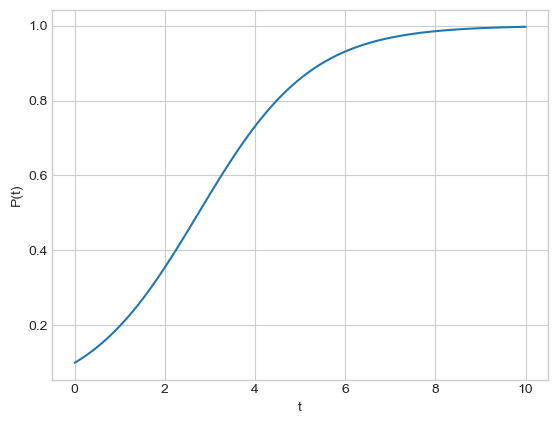

In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid') # to make plots look better

def dPdt(P, t, r):
    return r * P * (1 - P)

# @interact
def plot_solution(r=(0.01, 4, 0.1)):
    t = np.linspace(0, 10, 100)
    P0 = 0.1
    P = odeint(dPdt, P0, t, args=(r,))
    plt.plot(t, P)
    plt.xlabel('t')
    plt.ylabel('P(t)')
    plt.show()

plot_solution(.8)

### Task 2: Define Logistic Map and plot its evolution

Define the *recurrence equation* of the logistic map as a function of $P_n$ and $r$. Then plot the evolution of the population size for different values of $r$ and $P_0$.

In [2]:
def logistic_map(x, r):
    return r * x * (1 - x)

Define a function that iterates the logistic map for $n$ steps, starting from $P_0$. Note that since it is discrete, we don't use `odeint`, but a for loop.

In [3]:
def logistic_dynamics(P0, r, n):
    P = np.zeros(n)
    P[0] = P0
    for i in range(1, n):
        P[i] = logistic_map(P[i-1], r)
    return P

@interact
def plot_logistic_map(r=(0.01, 4.1, 0.01), P0=(0.1, 1, 0.01)):
    iterations = 100
    x = logistic_dynamics(P0=P0, r=r, n=iterations)
    plt.plot(x, 'o-')
    plt.xlabel('iterations')
    plt.ylabel('P')
    plt.ylim(0, 1)
    plt.show()

# plot_logistic_map(r=3.45, P0=0.1)

interactive(children=(FloatSlider(value=2.05, description='r', max=4.1, min=0.01, step=0.01), FloatSlider(valu…

**Questions 1:** What is the fundemental difference in modelling $P_{n+1}$ vs $\frac{dP}{dt}$? What is the difference in the way we solve the two equations?

**Answer:** The two models look very similar, but in the discrete map we don't model the differential, but rather the *level* of $P$.

**Questions 2:** What do you observe about the behavior of the logistic map as $r$ increases? What happens when $r$ is greater than 1, 3, 4?

**Answer:**
- $r<1$: The population shrinks.
- $1<r$: The population grows to a stable value.
- around $r=3$: The population grows to a stable value, but oscillates around it.
- $r>4$: Divergence


**Question 3:** What happens at $r=3.9$ and $P_0$ changes? 

**Answer:** Slight changes to initial conditions lead to large changes in the evolution of the system.

## Section 2: Cobweb Plot

Above in the iterative generation of $P_n$ we have done applied the logistic map $f$ to an initial value of $P_0$ repeatedly, creating a sequence such as $ f(P_0), f(f(P_0)), f(f(f(P_0))), \ldots $. This process can be visualised with a cobweb plot.
This is a technique not unique to the logistic map but applicable to any iterative function.
The purpose of the cobweb plot is to understand *how* the function $f$ behaves affects the sequence $P_n$.


Here's a step by step explanation of the construction of a cobweb plot:

1. Plot the function $f(x) $.
2. Plot the identity line $y = x$.
3. Start at the initial point $(x_0, x_0)$ located on the identity line.
4. Vertical move: From $(x_0, x_0)$, draw a vertical line to $(x_0, f(x_0))$. This step represents the application of the function $f$ to the initial value.
5. Horizontal move: Next, draw a horizontal line from $(x_0, f(x_0))$ to $(f(x_0), f(x_0))$ updating the input value to $x_1 = y_0 = f(x_0)$.
6. Repeat the vertical and horizontal movements.


I provide the code for the cobweb plot below. I encourage you read through it and try to understand what each line does, this will help you understand what the output of the cobweb plot means.


In [4]:
import matplotlib.pyplot as plt
import numpy as np


def annotate_point(ax, x, y, text, xytext=(0, 0)):
    """
    Annotate a point on a matplotlib axis.
    """
    ax.annotate(text,
                    xy=(x, y), xycoords='data',
                    xytext=xytext, textcoords='offset points',
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="arc3,rad=.2"))


def plot_cobweb(f, x0, n, show_annotation=True, **f_kwargs):
    """
    Plot the cobweb plot for a function f, starting point x0, and number of steps n.
    
    Args:
        f (function): Function of the form f(x, **f_kwargs), where x is a float and f_kwargs are additional keyword arguments.
        x0 (float): Initial value.
        n (int): Number of iterations.
        show_annotation (bool): Whether to show annotations for the first iteration.
        **f_kwargs: Additional keyword arguments to pass to f.
    """
    # Initialize figure
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    # Plot y = f(x) and y = x
    x = np.linspace(0, 1, 500)
    y = f(x, **f_kwargs)
    ax.plot(x, y, 'blue', lw=1, label='$f$')
    ax.plot(x, x, 'gray', lw=.5, label='Identity line', linestyle='dashed')
    
    x_n = x0
    for i in range(n):
        y_n = f(x_n, **f_kwargs)
        
        # Plot vertical move to f(x)
        ax.plot([x_n, x_n], [x_n, y_n], 'r', lw=1)
        # Plot horizontal move to y=x
        ax.plot([x_n, y_n], [y_n, y_n], 'r', lw=1)
        
        # Annotate the first iteration
        if i == 0 and show_annotation:
            ax.plot([x0], [x0], 'ok')
            annotate_point(ax, x0, x0, f'Initial Point\n$(x_0, x_0)$', xytext=(-50, 30))
            annotate_point(ax, x_n, y_n, f'Apply $f$\n$(x_0, f(x_0))$', xytext=(-50, 10))
            annotate_point(ax, y_n, y_n, f'First iteration\n$(x_1,x_1)$', xytext=(-50, -50))
        
        # Update the point
        x_n = y_n

    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    
    # turn off grid
    ax.grid(False)
    
    # Display the plot
    plt.show()

# Plot cobweb plot for logistic map with r=2.6 and x0=0.2, for 100 iterations
@interact
def plot_cw(r=(.5, 4.1, .1,), x0=(0.01, 1., 0.05), n=(0, 10, 1), show_annotation=True):
    plot_cobweb(f=logistic_map, n=n, x0=x0, show_annotation=show_annotation, r=r)

# plot for fixed values
# plot_cw(r=2.9, x0=0.1, n=100)

interactive(children=(FloatSlider(value=2.2, description='r', max=4.1, min=0.5), FloatSlider(value=0.46, descr…

### Task 1: Explore the parameters of the cobweb plot of the logistic map

**Question 4:** What do you observe in the cobweb plot as $r$ increases? What happens when $r$ is greater than 1, 3, 4? Why does this happen, graphically?

**Answer:**

**Question 5:** What happens at $r>4$? Looking at $f(x)$ what is the intuition for why higher values behave this way? **Hint:** Keep the iterations low i.e., $n<5$ to be able to see the behavior.  

**Answer:** $x$ may become larger than 1, which then maps to a negative value and then diverges.

### Task 2: Apply the cobweb plot to other functions

Define two functions (one linear one "complex") and visualize how the cobweb evolves.

**Question 6:** How does your function behave differently from the logistic map? Why?
**Answer:**

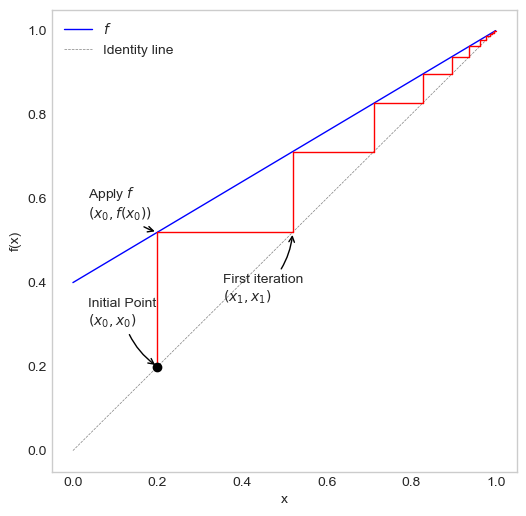

In [5]:
def other_function(x, a, b):
    return a * x + b 
    

# @interact
def plot_linear(a=(0.1, 1.0, .1), b=(0.01, .5, 0.05), n=(0, 20, 1), x0=(0.01, 1., 0.05)):
    plot_cobweb(f=other_function, n=n, x0=x0, a=a, b=b)

# plot for fixed values
plot_linear(a=0.6, b=0.4, n=100, x0=0.2)

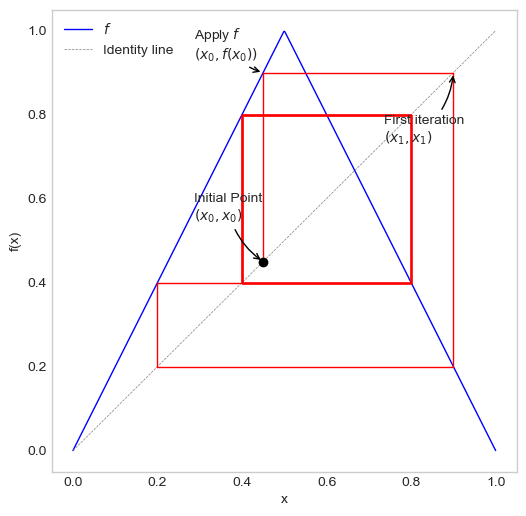

In [6]:
def tent_map(x, r):
    return r * np.minimum(x, 1 - x)

plot_cobweb(f=tent_map, n=20, x0=0.45, r=2)

## Section 3: Bifurcation Diagram

For the logistic map, the bifuraction diagram depicts the long-term values at which the system settles for each value of the growth rate parameter $ r $. The diagram is constructed by iterating the logistic map for a range of values of $ r $.

Here is a step-by-step description of how to construct a bifurcation diagram for the logistic map:

1. Write a function that for a given $r$ and $P_0$ iterates the logistic map for $n$ steps and returns the last $m$ values of $P$. By taking only the last $m$ values, we are ignoring the transient behavior of the system.
2. For $2.5<r<4$ iterate this function and store the last $m$ values of $P$.
3. Plot $r$ on the x-axis and the list of $P$ values on the y-axis, i.e., the bifurcation diagram.

In [7]:
def logistic_dynamics(P0, r, n, m=100):
    P = np.zeros(n)
    P[0] = P0
    for i in range(1, n):
        P[i] = logistic_map(P[i-1], r)
    return P[-m:]

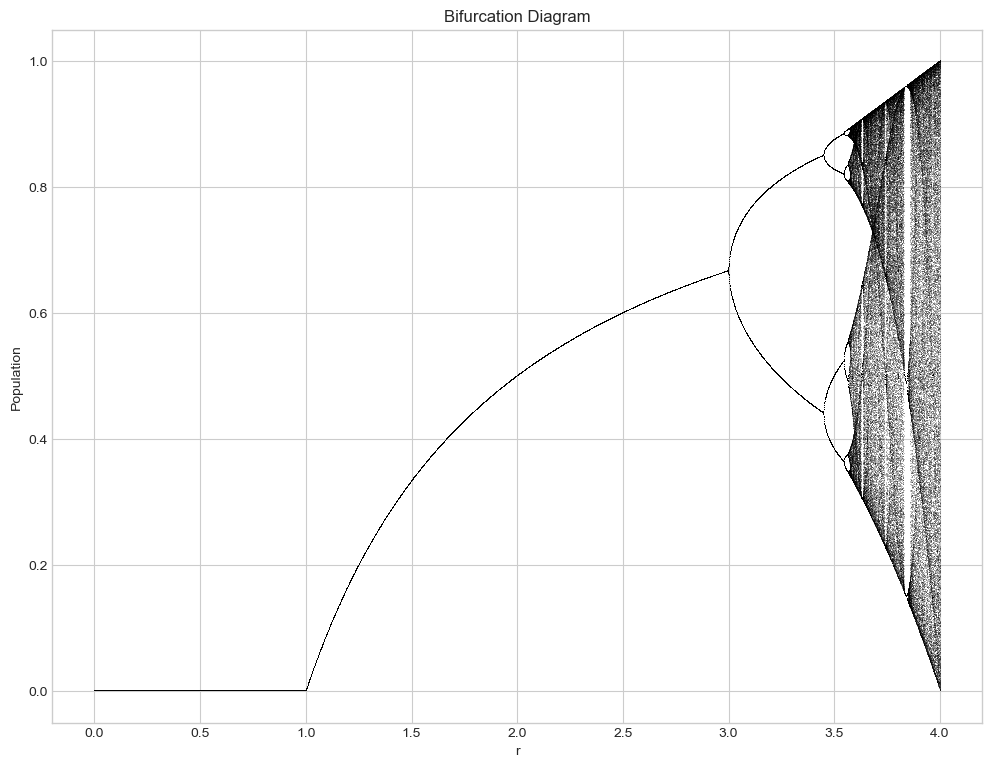

In [8]:
def plot_bifurcation(r_values, P0, n, m):
    """
    Plot the bifurcation diagram for the logistic map.
    
    Parameters:
        r_values (array-like): An array of r values to iterate over.
        P0 (float): The initial population size.
        n (int): The total number of iterations per r value.
        last (int): The number of iterations to plot to show long-term behavior.
    """
    # Initialize the array to hold the data points to plot
    r_points = [] # this be a list of r values corresponding to the P_points
    P_points = [] # this will be a list of P values corresponding to the r_points

    # Loop over the r values
    for r in r_values:
        # compute long term P values for the current r 
        P = logistic_dynamics(P0, r, n, m)
        
        r_points.extend([r] * m) # add r to the r_points list "m" times
        P_points.extend(P)
    
    # Plot the bifurcation diagram
    plt.figure(figsize=(12, 9))
    plt.plot(r_points, P_points, ',k', alpha=0.25)
    plt.title("Bifurcation Diagram")
    plt.xlabel('r')
    plt.ylabel('Population')
    plt.show()


r_values = np.linspace(0, 4.0, 4000)
plot_bifurcation(r_values, P0=0.1, n=1000, m=300)


**Question:** What do you observe in the bifurcation diagram as $ r $ increases? What happens when $ r $ is greater than 2.6, 3.2, 3.5, and 3.9? What happens there in terms of "stability"?

**Answer:** As $ r $ increases:
- At $ r > 2.6 $, we start to see the first bifurcation, where the population transitions from one stable equilibrium to a stable 2-cycle, meaning the population size oscillates between two values.
- Beyond $ r > 3.2 $, further bifurcations occur leading to 4-cycles, 8-cycles, and so on, indicating periods of doubling leading to chaos. This is a classic route to chaos known as period-doubling.
- When $ r > 3.5 $, the behavior becomes increasingly complex, with the emergence of chaotic bands separated by windows of periodic behavior.
- At $ r > 3.9 $, the system displays fully developed chaos with only small islands of stability. Here, small changes in $ r $ can lead to unpredictable changes in the long-term behavior of the population size, indicating a highly sensitive dependence on initial conditions and parameters, which is a hallmark of chaotic systems.

**Question:** How is this bifurcation diagram different from bifurcation diagrams for continuous systems we have seen in the past?

**Answer:** The bifurcation diagram for the logistic map, a discrete system, differs from those of continuous systems in several ways:

- In continuous systems, bifurcation diagrams represent changes in the system's equilibrium by setting the time derivative $ dP/dt $ to zero and solving for $ P $.
- For the logistic map, the bifurcation diagram is constructed by iterating a function and observing the long-term behavior of these iterations (not necessarily a fixed point).